<a href="https://colab.research.google.com/github/jessecaj/DSC590-1/blob/main/J_RWJF_zip_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install researchpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive")

In [ ]:
!ls

'Colab Notebooks'
'Copy of DemographicVariableListVote.gsheet'
'Copy of Utica_Field_Lookup.xlsx'
'Copy of Utica_ZIP_Report_2019.xlsx'
'Copy of Utica_ZIP_Report_2020.xlsx'
'Copy of Utica_ZIP_Report_2021.xlsx'
'Group C Information Assurance Standards Presentation: FISMA.gslides'
'Johnson, Jesseca DSC 509 Final Paper Spring B 2022.gdoc'
 notebook-checkpoint.ipynb
 notebook.ipynb


In [ ]:
import pandas as pd
import numpy as np
import researchpy as rp
import scipy.stats as stats
import mlxtend
from scipy.stats import zscore

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import 2019, 2021 data files and metadata
df_2019 = pd.read_excel(r'Copy of Utica_ZIP_Report_2019.xlsx')
df_2021 = pd.read_excel(r'Copy of Utica_ZIP_Report_2021.xlsx')
df_metadata = pd.read_excel(r'Copy of Utica_Field_Lookup.xlsx')

In [ ]:
# Create metadata dictionary so that we can look up column descriptions at any time
metadata_dict = df_metadata.set_index('Variable').to_dict()['Description']
print(metadata_dict)

{'DWLCYOCCUP': 'Housing units occupied', 'DWLCYVACNT': 'Housing units vacant', 'DWLCYOWNED': 'Occupied units owner', 'DWLCYRENT': 'Occupied units renter', 'POPCY': 'Population', 'POPCYFAM': 'Population in Family Households', 'AGECY0004': 'Population age 0-4', 'AGECY0509': 'Population age 5-9', 'AGECY1014': 'Population age 10-14', 'AGECY1519': 'Population age 15-19', 'AGECY2024': 'Population age 20-24', 'AGECY2529': 'Population age 25-29', 'AGECY3034': 'Population age 30-34', 'AGECY3539': 'Population age 35-39', 'AGECY4044': 'Population age 40-44', 'AGECY4549': 'Population age 45-49', 'AGECY5054': 'Population age 50-54', 'AGECY5559': 'Population age 55-59', 'AGECY6064': 'Population age 60-64', 'AGECY6569': 'Population age 65-69', 'AGECY7074': 'Population age 70-74', 'AGECY7579': 'Population age 75-79', 'AGECY8084': 'Population age 80-84', 'AGECYGT85': 'Population age 85+', 'AGECYMED': 'Median Age', 'SEXCYMAL': 'Population male', 'SEXCYFEM': 'Population female', 'RACCYWHITE': 'Population

In [ ]:
# How to get descriptions from variable names:
# DWLCYOCCUP_desc = metadata_dict.get('DWLCYOCCUP')
# print(DWLCYOCCUP_desc)

In [ ]:
# Isolate NY data only
ny_df_2019 = df_2019[df_2019['STATE'] == 'NY']
ny_df_2021 = df_2021[df_2021['STATE'] == 'NY']

In [ ]:
# Look at shape of each 
print("\nny_df_2019 shape:")
print(ny_df_2019.shape)
print("\nny_df_2021 shape:")
print(ny_df_2021.shape)


ny_df_2019 shape:
(1812, 124)

ny_df_2021 shape:
(1813, 146)


In [ ]:
# Need to figure out which columns ny_df_2021 has that ny_df_2019 does not
# Make list of each

print("\nNY DF 2019 column names:")
ny_varNames_2019 = list(ny_df_2019.columns)
print(ny_varNames_2019)

print("\nNY DF 2021 column names:")
ny_varNames_2021 = list(ny_df_2021.columns)
print(ny_varNames_2021)


NY DF 2019 column names:
['ZIP Code', 'ZIP Name', 'COUNTY', 'STATE', 'DWLCYOCCUP', 'DWLCYVACNT', 'DWLCYOWNED', 'DWLCYRENT', 'POPCY', 'POPCYFAM', 'AGECY0004', 'AGECY0509', 'AGECY1014', 'AGECY1519', 'AGECY2024', 'AGECY2529', 'AGECY3034', 'AGECY3539', 'AGECY4044', 'AGECY4549', 'AGECY5054', 'AGECY5559', 'AGECY6064', 'AGECY6569', 'AGECY7074', 'AGECY7579', 'AGECY8084', 'AGECYGT85', 'AGECYMED', 'SEXCYMAL', 'SEXCYFEM', 'RACCYWHITE', 'RACCYBLACK', 'RACCYAMIND', 'RACCYASIAN', 'RACCYHAWAI', 'RACCYOTHER', 'RACCYMULT', 'HISCYHISP', 'HISCYNONH', 'RCHCYWHNHS', 'RCHCYBLNHS', 'RCHCYAMNHS', 'RCHCYASNHS', 'RCHCYHANHS', 'RCHCYOTNHS', 'RCHCYMUNHS', 'RCHCYWHHIS', 'RCHCYBLHIS', 'RCHCYAMHIS', 'RCHCYASHIS', 'RCHCYHAHIS', 'RCHCYOTHIS', 'RCHCYMUHIS', 'MARCYNEVER', 'MARCYMARR', 'MARCYSEP', 'MARCYDIVOR', 'MARCYWIDOW', 'AGECYGT15', 'AGECYGT25', 'EDUCYLTGR9', 'EDUCYSHSCH', 'EDUCYHSCH', 'EDUCYSCOLL', 'EDUCYASSOC', 'EDUCYBACH', 'EDUCYGRAD', 'LBFCYPOP16', 'LBFCYARM', 'LBFCYEMPL', 'LBFCYUNEM', 'LBFCYNLF', 'UNECYRATE', 

In [ ]:
# Print list of columns that are present in the 2021 NY data but not in 2019 NY data
ny_2019_2021_differences = list(set(ny_df_2021).difference(ny_df_2019))
print(ny_2019_2021_differences)

['NRPBYTTOT', 'NRPBYQ2FMF', 'NRPCYQ2PER', 'NRPCYQ2RV', 'NRPCYQ2PHO', 'NRPCYQ2HM2', 'NRPCYQ2MIG', 'NRPBYQ2TOT', 'NRPBYQ2CMP', 'NRPBYQ2HM2', 'NRPBYQ2MIG', 'NRPCYQ2CMP', 'NRPBYQ2PHO', 'NRPBYQ2PER', 'NRPCYQ2TOT', 'NRPBYQ2RV', 'NRPCYQ2BUS', 'NRPCYQ2FMF', 'NRPCYQ2HTL', 'NRPCYQ2BSD', 'NRPBYQ2HTL', 'NRPCYQ2BSF']


In [ ]:
# Get all descriptions for columns missing from ny_df_2019
for x in ny_2019_2021_differences:
        print(x, metadata_dict.get(x))

NRPBYTTOT Average Annual Non-Resident Population (2019)
NRPBYQ2FMF Q2 Leisure Travelers Staying with Family/Friends (2019)
NRPCYQ2PER Q2 Leisure/Personal Travelers
NRPCYQ2RV Q2 Leisure Travelers in Recreational Vehicle
NRPCYQ2PHO Q2 Leisure Travelers Staying at Hotels
NRPCYQ2HM2 Q2 Leisure Travelers Staying at 2nd Home/Rental
NRPCYQ2MIG Q2 Migrant Workers
NRPBYQ2TOT Q2 Non-Resident Population (2019)
NRPBYQ2CMP Q2 Leisure Travelers Camping (2019)
NRPBYQ2HM2 Q2 Leisure Travelers Staying at 2nd Home/Rental (2019)
NRPBYQ2MIG Q2 Migrant Workers (2019)
NRPCYQ2CMP Q2 Leisure Travelers Camping
NRPBYQ2PHO Q2 Leisure Travelers Staying at Hotels (2019)
NRPBYQ2PER Q2 Leisure/Personal Travelers (2019)
NRPCYQ2TOT Q2 Non-Resident Population
NRPBYQ2RV Q2 Leisure Travelers in Recreational Vehicle (2019)
NRPCYQ2BUS Q2 Business Travelers
NRPCYQ2FMF Q2 Leisure Travelers Staying with Family/Friends
NRPCYQ2HTL Q2 Non-Residents At Hotels
NRPCYQ2BSD Q2 Domestic Business Travelers
NRPBYQ2HTL Q2 Non-Residents A

In [ ]:
# Since the data missing from 2019 is about travelers, and we are not concerned with that info, it can safely be
# ignored

In [ ]:
# Get descriptive stats for key variables
# INCCYMEDHH - Median Household Income
# HMVCYCREDC - Avg credit card debt

rp.codebook(ny_df_2019['INCCYMEDHH'])

Variable: INCCYMEDHH    Data Type: int64 

 Number of Obs.: 1812 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1695 

 Range: [0, 250297] 
 Mean: 69833.54 
 Standard Deviation: 32016.11 
 Mode: 0 
 10th Percentile: 43182.3 
 25th Percentile: 54213.25 
 50th Percentile: 63741.0 
 75th Percentile: 82306.75 
 90th Percentile: 110558.1 







In [ ]:
rp.codebook(ny_df_2021['INCCYMEDHH'])

Variable: INCCYMEDHH    Data Type: int64 

 Number of Obs.: 1813 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1700 

 Range: [0, 350000] 
 Mean: 73773.32 
 Standard Deviation: 35968.62 
 Mode: 0 
 10th Percentile: 45701.4 
 25th Percentile: 56375.0 
 50th Percentile: 66216.0 
 75th Percentile: 86268.0 
 90th Percentile: 117660.39999999998 







In [ ]:
INCCYMEDHH_raw_diff = 73773.32-69833.54
INCCYMEDHH_pct_diff = (INCCYMEDHH_raw_diff / 69833.54)*100
print("Mean Median Household Income in 2019: 69833.54")
print("Mean Median Household Income in 2021: 73773.32")
print("\nRaw difference:")
print(INCCYMEDHH_raw_diff)
print("\nPercent difference:")
print(INCCYMEDHH_pct_diff)
print("\nMean Median Household Income increased 5.64% from 2019 to 2021")

Mean Median Household Income in 2019: 69833.54
Mean Median Household Income in 2021: 73773.32

Raw difference:
3939.7800000000134

Percent difference:
5.641673041349492

Mean Median Household Income increased 5.64% from 2019 to 2021


In [ ]:
rp.codebook(ny_df_2019['HMVCYCREDC'])

Variable: HMVCYCREDC    Data Type: int64 

 Number of Obs.: 1812 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1081 

 Range: [0, 4854] 
 Mean: 2775.33 
 Standard Deviation: 794.22 
 Mode: 0 
 10th Percentile: 2263.1 
 25th Percentile: 2558.0 
 50th Percentile: 2811.5 
 75th Percentile: 3218.75 
 90th Percentile: 3607.9 







In [ ]:
rp.codebook(ny_df_2021['HMVCYCREDC'])

Variable: HMVCYCREDC    Data Type: int64 

 Number of Obs.: 1813 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1082 

 Range: [0, 4708] 
 Mean: 2689.47 
 Standard Deviation: 777.61 
 Mode: 0 
 10th Percentile: 2147.2 
 25th Percentile: 2429.0 
 50th Percentile: 2698.0 
 75th Percentile: 3133.0 
 90th Percentile: 3557.6 







In [ ]:
HMVCYCREDC_raw_diff = 2689.47 - 2775.33
HMVCYCREDC_pct_diff = (HMVCYCREDC_raw_diff / 2689.47)*100
print("Mean Average Credit Card Debt in 2019: 2775.33")
print("Mean Average Credit Card Debt in 2021: 2689.47")
print("\nRaw difference:")
print(HMVCYCREDC_raw_diff)
print("\nPercent difference:")
print(HMVCYCREDC_pct_diff)
print("\nAverage credit card debt decreased 3.19% from 2019 to 2021")

Mean Average Credit Card Debt in 2019: 2775.33
Mean Average Credit Card Debt in 2021: 2689.47

Raw difference:
-85.86000000000013

Percent difference:
-3.1924505571729793

Average credit card debt decreased 3.19% from 2019 to 2021


In [ ]:
# Make copies of datasets to join
ny_df_2019_copy = ny_df_2019.copy()
ny_df_2021_copy = ny_df_2021.copy()

In [ ]:
ny_df_2019_copy = ny_df_2019_copy.add_suffix('_2019')
ny_df_2021_copy = ny_df_2021_copy.add_suffix('_2021')

In [ ]:
# Rename zip code vars since that's what we're joining on
ny_df_2019_copy = ny_df_2019_copy.rename(columns={'ZIP Code_2019': 'ZIP_Code'})
ny_df_2021_copy = ny_df_2021_copy.rename(columns={'ZIP Code_2021': 'ZIP_Code'})

In [ ]:
# Merge datasets
ny_merged = ny_df_2019_copy.merge(ny_df_2021_copy, on='ZIP_Code', how='inner')
ny_merged

,ZIP_Code,ZIP Name_2019,COUNTY_2019,STATE_2019,DWLCYOCCUP_2019,DWLCYVACNT_2019,DWLCYOWNED_2019,DWLCYRENT_2019,POPCY_2019,POPCYFAM_2019,...,HMVCYINSTL_2021,HMVCYLNCRE_2021,HMVCYCREDC_2021,HMVCYDIRE_2021,HMVCYDOTH_2021,HMVCYDANY_2021,WRHCYASS_2021,WRHCYDBT_2021,WRHCYAGG_2021,WRHCYAVEHH_2021
0,6390,FISHERS ISLAND,SUFFOLK,NY,126,454,60,66,248,182,...,14152,913,2909,10780,1410,111022,102571981,12434516,90137466,804799
1,10001,NEW YORK,NEW YORK,NY,16525,1010,3369,13156,28740,13398,...,15681,2181,3231,23867,3165,172475,28522061919,2574211834,25947850084,1738529
2,10002,NEW YORK,NEW YORK,NY,35124,1477,5321,29803,82868,59995,...,11503,773,2200,9571,1558,91584,30991811079,3558034832,27433776250,706144
3,10003,NEW YORK,NEW YORK,NY,30780,2327,9026,21754,57643,17548,...,16665,2646,3466,28328,3672,194950,66721902584,5744824221,60977078360,2069255
4,10004,NEW YORK,NEW YORK,NY,2265,383,361,1904,4300,2735,...,19814,4224,4201,43646,5521,272375,5572594141,437643994,5134950148,3195827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,14898,WOODHULL,STEUBEN,NY,604,170,508,95,1638,1424,...,12030,293,2405,5183,846,78352,235454915,40583504,194871411,376228
1808,14901,ELMIRA,CHEMUNG,NY,5894,806,2758,3136,14236,9401,...,10278,249,1916,4233,910,63366,2180463339,358887298,1821576041,321620
1809,14903,ELMIRA,CHEMUNG,NY,3403,241,2172,1231,8595,5800,...,12767,585,2573,8138,1233,94818,2258253471,313027903,1945225571,589219
1810,14904,ELMIRA,CHEMUNG,NY,6754,588,4048,2706,15216,11756,...,11333,184,2209,3980,771,69430,2405463747,461895666,1943568081,292148


In [ ]:
ny_merged[ny_merged.isna().any(axis=1)]

,ZIP_Code,ZIP Name_2019,COUNTY_2019,STATE_2019,DWLCYOCCUP_2019,DWLCYVACNT_2019,DWLCYOWNED_2019,DWLCYRENT_2019,POPCY_2019,POPCYFAM_2019,...,HMVCYINSTL_2021,HMVCYLNCRE_2021,HMVCYCREDC_2021,HMVCYDIRE_2021,HMVCYDOTH_2021,HMVCYDANY_2021,WRHCYASS_2021,WRHCYDBT_2021,WRHCYAGG_2021,WRHCYAVEHH_2021


In [ ]:
ny_merged = ny_merged.dropna()
print(ny_merged.shape)

(1812, 269)


In [ ]:
# Subtract 2021 median hh income from 2019 in a new column
ny_merged['INCCYMEDHH_21_sub_19'] = ny_merged['INCCYMEDHH_2021'].sub(ny_merged['INCCYMEDHH_2019'], axis = 0)

In [ ]:
# Divide difference between 2021 and 2019 median hh income by 2019 median hh income to get percent change
ny_merged['INCCYMEDHH_change_19_21'] = (ny_merged['INCCYMEDHH_21_sub_19'].div(ny_merged['INCCYMEDHH_2019']))
ny_merged['INCCYMEDHH_change_19_21']

0      -0.558217
1       0.031675
2      -0.076411
3       0.091026
4       0.355688
          ...   
1807    0.094327
1808    0.079517
1809    0.008473
1810    0.053320
1811    0.071305
Name: INCCYMEDHH_change_19_21, Length: 1812, dtype: float64

In [ ]:
# View infinite values

ny_merged_inf = ny_merged[(ny_merged == np.inf).any(axis=1)]
print(ny_merged_inf)

      ZIP_Code       ZIP Name_2019  COUNTY_2019 STATE_2019  DWLCYOCCUP_2019  \
52       10112            NEW YORK     NEW YORK         NY                0   
66       10166            NEW YORK     NEW YORK         NY                0   
148      10540         LINCOLNDALE  WESTCHESTER         NY                0   
317      11256            BROOKLYN        KINGS         NY                0   
597      12085  GUILDERLAND CENTER       ALBANY         NY                0   
940      12864              SABAEL     HAMILTON         NY                0   
1375     13794            KILLAWOG       BROOME         NY                0   
1505     14168          VERSAILLES  CATTARAUGUS         NY                0   

      DWLCYVACNT_2019  DWLCYOWNED_2019  DWLCYRENT_2019  POPCY_2019  \
52                  0                0               0           0   
66                  0                0               0           0   
148                 0                0               0           0   
317     

In [ ]:
# Inf values are all due to having 0 people living in that zip code, so they can safely be dropped
# Replace inf values with na
ny_merged['INCCYMEDHH_change_19_21'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Drop na values in ny_merged['INCCYMEDHH_change_19_21'] and get new number of rows
ny_merged = ny_merged[ny_merged['INCCYMEDHH_change_19_21'].notna()]
print(ny_merged.shape)

(1722, 271)


In [ ]:
# Run basic stats on ny_merged['INCCYMEDHH_change_19_21']
rp.codebook(ny_merged['INCCYMEDHH_change_19_21'])

Variable: INCCYMEDHH_change_19_21    Data Type: float64 

 Number of Obs.: 1722 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1711 

 Range: [-1.0, 1.000011428636735] 
 Mean: 0.05 
 Standard Deviation: 0.11 
 Mode: -1.0 
 10th Percentile: -0.05845782798546252 
 25th Percentile: -0.0015289611039046515 
 50th Percentile: 0.04902792147032284 
 75th Percentile: 0.0993238380174523 
 90th Percentile: 0.1580404630268891 







In [ ]:
# Make new column for z-score for changes in median hh income
ny_merged['INCCYMEDHH_change_z-score'] = stats.zscore(ny_merged['INCCYMEDHH_change_19_21'])
ny_merged['INCCYMEDHH_change_z-score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      -5.539727
1      -0.157332
2      -1.143550
3       0.384213
4       2.799085
          ...   
1807    0.414331
1808    0.279203
1809   -0.369030
1810    0.040165
1811    0.204267
Name: INCCYMEDHH_change_z-score, Length: 1722, dtype: float64

In [ ]:
# Follow same process to get z-scores for changes in cc debt
# Subtract 2021 mean avg cc debt from 2019 in a new column
ny_merged['HMVCYCREDC_21_sub_19'] = ny_merged['HMVCYCREDC_2021'].sub(ny_merged['HMVCYCREDC_2019'], axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Divide difference between 2021 and 2019 mean avg cc debt by 2019 mean avg cc debt to get percent change
ny_merged['HMVCYCREDC_change_19_21'] = (ny_merged['HMVCYCREDC_21_sub_19'].div(ny_merged['HMVCYCREDC_2019']))
ny_merged['HMVCYCREDC_change_19_21']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      -0.276368
1      -0.018530
2      -0.083333
3      -0.005452
4       0.057387
          ...   
1807   -0.035299
1808   -0.031834
1809   -0.048095
1810   -0.055983
1811   -0.064089
Name: HMVCYCREDC_change_19_21, Length: 1722, dtype: float64

In [ ]:
# # Replace inf values with na
# ny_merged['HMVCYCREDC_change_19_21'].replace([np.inf, -np.inf], np.nan, inplace=True)
# ny_merged['HMVCYCREDC_change_19_21']

In [ ]:
HMVCYCREDC_change_19_21_null = ny_merged['HMVCYCREDC_change_19_21'].isna()
print(HMVCYCREDC_change_19_21_null)

0       False
1       False
2       False
3       False
4       False
        ...  
1807    False
1808    False
1809    False
1810    False
1811    False
Name: HMVCYCREDC_change_19_21, Length: 1722, dtype: bool


In [ ]:
# Drop na values in ny_merged['HMVCYCREDC_change_19_21'] and get new number of rows
ny_merged = ny_merged[ny_merged['HMVCYCREDC_change_19_21'].notna()]
print(ny_merged.shape)

(1722, 274)


In [ ]:
# Run basic stats on ny_merged['HMVCYCREDC_change_19_21']
rp.codebook(ny_merged['HMVCYCREDC_change_19_21'])

Variable: HMVCYCREDC_change_19_21    Data Type: float64 

 Number of Obs.: 1722 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1699 

 Range: [-1.0, 0.43522561863173215] 
 Mean: -0.04 
 Standard Deviation: 0.06 
 Mode: 0.0 
 10th Percentile: -0.08861235823031806 
 25th Percentile: -0.06013429888488623 
 50th Percentile: -0.033735649113757725 
 75th Percentile: -0.007863731114281718 
 90th Percentile: 0.01762437967971565 







In [ ]:
# Run basic stats on ny_merged['INCCYMEDHH_change_19_21']
rp.codebook(ny_merged['INCCYMEDHH_change_19_21'])

Variable: INCCYMEDHH_change_19_21    Data Type: float64 

 Number of Obs.: 1722 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1711 

 Range: [-1.0, 1.000011428636735] 
 Mean: 0.05 
 Standard Deviation: 0.11 
 Mode: -1.0 
 10th Percentile: -0.05845782798546252 
 25th Percentile: -0.0015289611039046515 
 50th Percentile: 0.04902792147032284 
 75th Percentile: 0.0993238380174523 
 90th Percentile: 0.1580404630268891 







In [ ]:
# Make new column for z-score for changes in mean avg cc debt
ny_merged['HMVCYCREDC_change_z-score'] = stats.zscore(ny_merged['HMVCYCREDC_change_19_21'])
ny_merged['HMVCYCREDC_change_z-score']

0      -3.864436
1       0.275517
2      -0.764994
3       0.485499
4       1.494471
          ...   
1807    0.006266
1808    0.061895
1809   -0.199189
1810   -0.325845
1811   -0.455997
Name: HMVCYCREDC_change_z-score, Length: 1722, dtype: float64

In [ ]:
ny_merged.dtypes

ZIP_Code                       int64
ZIP Name_2019                 object
COUNTY_2019                   object
STATE_2019                    object
DWLCYOCCUP_2019                int64
                              ...   
INCCYMEDHH_change_19_21      float64
INCCYMEDHH_change_z-score    float64
HMVCYCREDC_21_sub_19           int64
HMVCYCREDC_change_19_21      float64
HMVCYCREDC_change_z-score    float64
Length: 275, dtype: object

In [ ]:
# Drop uninteresting/irrelevant columns
ny_merged_v2 = ny_merged.drop(['DWLCYOCCUP_2019', 
'DWLCYVACNT_2019', 
'DWLCYOWNED_2019', 
'DWLCYRENT_2019', 
'POPCYFAM_2019', 
'AGECY0004_2019', 
'AGECY0509_2019', 
'AGECY1014_2019', 
'AGECY1519_2019', 
'AGECY2024_2019', 
'AGECY2529_2019', 
'AGECY3034_2019', 
'AGECY3539_2019', 
'AGECY4044_2019', 
'AGECY4549_2019', 
'AGECY5054_2019', 
'AGECY5559_2019', 
'AGECY6064_2019', 
'AGECY6569_2019', 
'AGECY7074_2019', 
'AGECY7579_2019', 
'AGECY8084_2019', 
'AGECYGT85_2019', 
'AGECYGT15_2019', 
'AGECYGT25_2019', 
'EDUCYLTGR9_2019', 
'EDUCYSHSCH_2019', 
'EDUCYSCOLL_2019', 
'EDUCYASSOC_2019', 
'LBFCYPOP16_2019', 
'LBFCYEMPL_2019', 
'LBFCYUNEM_2019', 
'LBFCYNLF_2019', 
'LBFCYLBF_2019', 
'LBFCYMARM_2019', 
'LBFCYMEMPL_2019', 
'LBFCYMNLF_2019', 
'LBFCYMUNEM_2019', 
'LBFCYFARM_2019', 
'LBFCYFEMPL_2019', 
'LBFCYFNLF_2019', 
'LBFCYFUNEM_2019', 
'HHDCY_2019', 
'HHDCYFAM_2019', 
'HHDCYNFM_2019', 
'HHSCYMCFCH_2019', 
'FAMCYAVESZ_2019', 
'HHDCYMEDAG_2019', 
'VPHCYNONE_2019', 
'VPHCY1_2019', 
'VPHCYGT1_2019', 
'INCCYAGG_2019', 
'INCCYAGGHD_2019', 
'INCCYAGGFA_2019', 
'INCCYAGGNF_2019', 
'INCCYAGGGP_2019', 
'INCCYPCAP_2019', 
'INCCYMEDFA_2019', 
'INCCYAVEHH_2019', 
'INCCYAVEFA_2019', 
'HAOCYTRAN_2019', 
'HDBCYMORT_2019', 
'HDBCYINSTL_2019', 
'HDBCYLNCRE_2019', 
'HMVCYMORT_2019', 
'HMVCYINSTL_2019', 
'HMVCYLNCRE_2019', 
'HMVCYDIRE_2019', 
'HMVCYDOTH_2019', 
'WRHCYASS_2019', 
'WRHCYDBT_2019', 
'WRHCYAGG_2019', 
'WRHCYAVEHH_2019', 
'DWLCYOCCUP_2021', 
'DWLCYVACNT_2021', 
'DWLCYOWNED_2021', 
'DWLCYRENT_2021', 
'POPCYFAM_2021', 
'AGECY0004_2021', 
'AGECY0509_2021', 
'AGECY1014_2021', 
'AGECY1519_2021', 
'AGECY2024_2021', 
'AGECY2529_2021', 
'AGECY3034_2021', 
'AGECY3539_2021', 
'AGECY4044_2021', 
'AGECY4549_2021', 
'AGECY5054_2021', 
'AGECY5559_2021', 
'AGECY6064_2021', 
'AGECY6569_2021', 
'AGECY7074_2021', 
'AGECY7579_2021', 
'AGECY8084_2021', 
'AGECYGT85_2021', 
'AGECYGT15_2021', 
'AGECYGT25_2021', 
'EDUCYLTGR9_2021', 
'EDUCYSHSCH_2021', 
'EDUCYSCOLL_2021', 
'EDUCYASSOC_2021', 
'LBFCYPOP16_2021', 
'LBFCYEMPL_2021', 
'LBFCYUNEM_2021', 
'LBFCYNLF_2021', 
'LBFCYLBF_2021', 
'LBFCYMARM_2021', 
'LBFCYMEMPL_2021', 
'LBFCYMNLF_2021', 
'LBFCYMUNEM_2021', 
'LBFCYFARM_2021', 
'LBFCYFEMPL_2021', 
'LBFCYFNLF_2021', 
'LBFCYFUNEM_2021', 
'HHDCY_2021', 
'HHDCYFAM_2021', 
'HHDCYNFM_2021', 
'HHSCYMCFCH_2021', 
'FAMCYAVESZ_2021', 
'HHDCYMEDAG_2021', 
'VPHCYNONE_2021', 
'VPHCY1_2021', 
'VPHCYGT1_2021', 
'INCCYAGG_2021', 
'INCCYAGGHD_2021', 
'INCCYAGGFA_2021', 
'INCCYAGGNF_2021', 
'INCCYAGGGP_2021', 
'INCCYPCAP_2021', 
'INCCYMEDFA_2021', 
'INCCYAVEHH_2021', 
'INCCYAVEFA_2021', 
'HAOCYTRAN_2021', 
'HDBCYMORT_2021', 
'HDBCYINSTL_2021', 
'HDBCYLNCRE_2021', 
'HMVCYMORT_2021', 
'HMVCYINSTL_2021', 
'HMVCYLNCRE_2021', 
'HMVCYDIRE_2021', 
'HMVCYDOTH_2021', 
'WRHCYASS_2021', 
'WRHCYDBT_2021', 
'WRHCYAGG_2021', 
'WRHCYAVEHH_2021',
'HDBCYCRED_2019', 
'HDBCYIRE_2019', 
'HDBCYOTHR_2019', 
'HDBCYANY_2019',
'HDDBT40_2019', 
'HDPMTDUE60_2019', 
'HMVCYDANY_2019',
'HDBCYCRED_2021', 
'HDBCYIRE_2021', 
'HDBCYOTHR_2021', 
'HDBCYANY_2021',
'HDDBT40_2021', 
'HDPMTDUE60_2021', 
'HMVCYDANY_2021',
'SEXCYMAL_2019', 
'SEXCYFEM_2019', 
'SEXCYMAL_2021', 
'SEXCYFEM_2021', 
'MARCYNEVER_2019', 
'MARCYSEP_2019', 
'MARCYDIVOR_2019', 
'MARCYWIDOW_2019', 
'MARCYNEVER_2021', 
'MARCYSEP_2021', 
'MARCYDIVOR_2021', 
'MARCYWIDOW_2021', 
'EDUCYHSCH_2019',
'EDUCYHSCH_2021',
    
], axis=1)

In [ ]:
# Drop all object type columns
ny_merged_v2 = ny_merged_v2.select_dtypes(exclude=['object'])

In [ ]:
# Make population percentage columns
# Married
ny_merged_v2['MARCYMARR_PCT_2019'] = ny_merged_v2['MARCYMARR_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['MARCYMARR_PCT_2021'] = ny_merged_v2['MARCYMARR_2021'].div(ny_merged_v2['POPCY_2019'])
# Black
ny_merged_v2['RACCYBLACK_PCT_2019'] = ny_merged_v2['RACCYBLACK_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['RACCYBLACK_PCT_2021'] = ny_merged_v2['RACCYBLACK_2021'].div(ny_merged_v2['POPCY_2019'])
# Hispanic
ny_merged_v2['HISCYHISP_PCT_2019'] = ny_merged_v2['HISCYHISP_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['HISCYHISP_PCT_2021'] = ny_merged_v2['HISCYHISP_2021'].div(ny_merged_v2['POPCY_2019'])
# White
ny_merged_v2['RACCYWHITE_PCT_2019'] = ny_merged_v2['RACCYWHITE_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['RACCYWHITE_PCT_2021'] = ny_merged_v2['RACCYWHITE_2021'].div(ny_merged_v2['POPCY_2019'])
# Asian
ny_merged_v2['RACCYASIAN_PCT_2019'] = ny_merged_v2['RACCYASIAN_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['RACCYASIAN_PCT_2021'] = ny_merged_v2['RACCYASIAN_2021'].div(ny_merged_v2['POPCY_2019'])
# Pop 16+ in Armed Forces
ny_merged_v2['LBFCYARM_PCT_2019'] = ny_merged_v2['LBFCYARM_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['LBFCYARM_PCT_2021'] = ny_merged_v2['LBFCYARM_2021'].div(ny_merged_v2['POPCY_2019'])
# Pop 25+ Bachelor's degree
ny_merged_v2['EDUCYBACH_PCT_2019'] = ny_merged_v2['EDUCYBACH_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['EDUCYBACH_PCT_2021'] = ny_merged_v2['EDUCYBACH_2021'].div(ny_merged_v2['POPCY_2019'])
# Pop 25+ graduate or prof school degree
ny_merged_v2['EDUCYGRAD_PCT_2019'] = ny_merged_v2['EDUCYGRAD_2019'].div(ny_merged_v2['POPCY_2019'])
ny_merged_v2['EDUCYGRAD_PCT_2021'] = ny_merged_v2['EDUCYGRAD_2021'].div(ny_merged_v2['POPCY_2019'])

In [ ]:
# Change all INF values in new percentage columns to NaN
ny_merged_v2['MARCYMARR_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['MARCYMARR_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYBLACK_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYBLACK_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['HISCYHISP_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['HISCYHISP_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYWHITE_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYWHITE_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYASIAN_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['RACCYASIAN_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['LBFCYARM_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['LBFCYARM_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['EDUCYBACH_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['EDUCYBACH_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['EDUCYGRAD_PCT_2019'].replace([np.inf, -np.inf], np.nan, inplace=True)
ny_merged_v2['EDUCYGRAD_PCT_2021'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Drop all NAs
ny_merged_v2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,ZIP_Code,POPCY_2019,AGECYMED_2019,RACCYWHITE_2019,RACCYBLACK_2019,RACCYAMIND_2019,RACCYASIAN_2019,RACCYHAWAI_2019,RACCYOTHER_2019,RACCYMULT_2019,...,RACCYWHITE_PCT_2019,RACCYWHITE_PCT_2021,RACCYASIAN_PCT_2019,RACCYASIAN_PCT_2021,LBFCYARM_PCT_2019,LBFCYARM_PCT_2021,EDUCYBACH_PCT_2019,EDUCYBACH_PCT_2021,EDUCYGRAD_PCT_2019,EDUCYGRAD_PCT_2021
0,6390,248,54.30,235,3,0,5,0,1,4,...,0.947581,0.754032,0.020161,0.012097,0.000000,0.000000,0.157258,0.056452,0.258065,0.032258
1,10001,28740,38.73,17846,3538,97,4868,6,1300,1086,...,0.620946,0.530585,0.169381,0.236952,0.000035,0.000870,0.300418,0.323312,0.249861,0.245511
2,10002,82868,41.28,29615,8520,286,35553,28,6478,2388,...,0.357376,0.286166,0.429032,0.565550,0.000000,0.000012,0.192668,0.205713,0.107894,0.105771
3,10003,57643,32.77,41372,3810,100,9084,24,1338,1915,...,0.717728,0.607238,0.157591,0.248669,0.000364,0.000382,0.320906,0.305189,0.266693,0.262998
4,10004,4300,38.26,2956,357,14,628,1,116,228,...,0.687442,0.441163,0.146047,0.183953,0.000930,0.000000,0.326977,0.263953,0.303023,0.255116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,14898,1638,36.63,1611,10,3,5,0,1,9,...,0.983516,0.855311,0.003053,0.004884,0.000000,0.000000,0.045177,0.037241,0.033578,0.040293
1808,14901,14236,34.20,11292,1790,56,154,3,125,816,...,0.793200,0.641894,0.010818,0.047345,0.000000,0.000000,0.063080,0.056547,0.046713,0.035052
1809,14903,8595,39.59,7248,873,23,154,3,101,192,...,0.843281,0.752065,0.017917,0.018848,0.001978,0.005352,0.092147,0.123560,0.091216,0.116230
1810,14904,15216,36.93,13233,1029,55,131,6,79,682,...,0.869677,0.815063,0.008609,0.007755,0.000000,0.000000,0.069269,0.065852,0.037395,0.049159


In [ ]:
# Drop original raw rpopulation columns that we already made percentages for
ny_merged_v2 = ny_merged_v2.drop(['MARCYMARR_2019', 'MARCYMARR_2021', 'RACCYBLACK_2019', 'RACCYBLACK_2021', 'HISCYHISP_2019', 'HISCYHISP_2021', 'RACCYWHITE_2019', 'RACCYWHITE_2021', 'RACCYASIAN_2019', 'RACCYASIAN_2021', 'LBFCYARM_2019', 'LBFCYARM_2021', 'EDUCYBACH_2019', 'EDUCYBACH_2021', 'EDUCYGRAD_2019', 'EDUCYGRAD_2021'], axis=1)


In [ ]:
# Drop other race columns and nonresident population columns
ny_merged_v2 = ny_merged_v2.drop([
'RACCYAMIND_2019', 
'RACCYHAWAI_2019', 
'RACCYOTHER_2019', 
'RACCYMULT_2019', 
'HISCYNONH_2019', 
'RCHCYWHNHS_2019', 
'RCHCYBLNHS_2019', 
'RCHCYAMNHS_2019', 
'RCHCYASNHS_2019', 
'RCHCYHANHS_2019', 
'RCHCYOTNHS_2019', 
'RCHCYMUNHS_2019', 
'RCHCYWHHIS_2019', 
'RCHCYBLHIS_2019', 
'RCHCYAMHIS_2019', 
'RCHCYASHIS_2019', 
'RCHCYHAHIS_2019', 
'RCHCYOTHIS_2019', 
'RCHCYMUHIS_2019',
'RACCYAMIND_2021', 
'RACCYHAWAI_2021', 
'RACCYOTHER_2021', 
'RACCYMULT_2021', 
'HISCYNONH_2021', 
'RCHCYWHNHS_2021', 
'RCHCYBLNHS_2021', 
'RCHCYAMNHS_2021', 
'RCHCYASNHS_2021', 
'RCHCYHANHS_2021', 
'RCHCYOTNHS_2021', 
'RCHCYMUNHS_2021', 
'RCHCYWHHIS_2021', 
'RCHCYBLHIS_2021', 
'RCHCYAMHIS_2021', 
'RCHCYASHIS_2021', 
'RCHCYHAHIS_2021', 
'RCHCYOTHIS_2021', 
'RCHCYMUHIS_2021', 
'NRPBYTTOT_2021',
 'NRPBYQ2TOT_2021',
 'NRPBYQ2MIG_2021',
 'NRPBYQ2PER_2021',
 'NRPBYQ2PHO_2021',
 'NRPBYQ2FMF_2021',
 'NRPBYQ2HM2_2021',
 'NRPBYQ2CMP_2021',
 'NRPBYQ2RV_2021',
 'NRPBYQ2HTL_2021',
 'NRPCYQ2TOT_2021',
 'NRPCYQ2BUS_2021',
 'NRPCYQ2BSD_2021',
 'NRPCYQ2BSF_2021',
 'NRPCYQ2MIG_2021',
 'NRPCYQ2PER_2021',
 'NRPCYQ2PHO_2021',
 'NRPCYQ2FMF_2021',
 'NRPCYQ2HM2_2021',
 'NRPCYQ2CMP_2021',
 'NRPCYQ2RV_2021',
 'NRPCYQ2HTL_2021',
], axis=1)

In [ ]:
# Drop any rows with a race, marriage %, armed forces, or education level percentage column value greater than 1 since having more than 
# 100% of any of those factors is impossible
indexNames = ny_merged_v2[ ny_merged_v2['MARCYMARR_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['MARCYMARR_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYBLACK_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYBLACK_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['HISCYHISP_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['HISCYHISP_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYWHITE_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYWHITE_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYASIAN_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['RACCYASIAN_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['LBFCYARM_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['LBFCYARM_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['EDUCYBACH_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['EDUCYBACH_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['EDUCYGRAD_PCT_2019'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)
indexNames = ny_merged_v2[ ny_merged_v2['EDUCYGRAD_PCT_2021'] > 1 ].index
ny_merged_v2.drop(indexNames , inplace=True)

In [ ]:
# Run basic stats on all race, armed forces, and education level percentage columns
rp.codebook(ny_merged_v2['POPCY_2019'])
rp.codebook(ny_merged_v2['AGECYMED_2019'])
rp.codebook(ny_merged_v2['HHDCYAVESZ_2019'])
rp.codebook(ny_merged_v2['MARCYMARR_PCT_2019'])
rp.codebook(ny_merged_v2['RACCYBLACK_PCT_2019'])
rp.codebook(ny_merged_v2['HISCYHISP_PCT_2019'])
rp.codebook(ny_merged_v2['RACCYWHITE_PCT_2019'])
rp.codebook(ny_merged_v2['RACCYASIAN_PCT_2019'])
rp.codebook(ny_merged_v2['LBFCYARM_PCT_2019'])
rp.codebook(ny_merged_v2['EDUCYBACH_PCT_2019'])
rp.codebook(ny_merged_v2['EDUCYGRAD_PCT_2019'])

Variable: POPCY_2019    Data Type: int64 

 Number of Obs.: 1657 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1533 

 Range: [5, 108470] 
 Mean: 11758.37 
 Standard Deviation: 18043.04 
 Mode: 61 
 10th Percentile: 318.4000000000001 
 25th Percentile: 1156.0 
 50th Percentile: 3596.0 
 75th Percentile: 14213.0 
 90th Percentile: 35429.20000000001 





Variable: AGECYMED_2019    Data Type: float64 

 Number of Obs.: 1657 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 1117 

 Range: [19.12, 74.88] 
 Mean: 42.27 
 Standard Deviation: 6.01 
 Mode: 44.22 
 10th Percentile: 34.94 
 25th Percentile: 39.05 
 50th Percentile: 42.66 
 75th Percentile: 45.48 
 90th Percentile: 49.45 





Variable: HHDCYAVESZ_2019    Data Type: float64 

 Number of Obs.: 1657 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 186 

 Range: [1.16, 4.25] 
 Mean: 2.37 
 Standard Deviation: 0.33 
 Mode: 2.17 
 10th Percentile:

In [ ]:
# Above, we can see that the number of rows is now 1657

In [ ]:
list(ny_merged_v2)

['ZIP_Code',
 'POPCY_2019',
 'AGECYMED_2019',
 'UNECYRATE_2019',
 'HHDCYAVESZ_2019',
 'INCCYMEDHH_2019',
 'HMVCYCREDC_2019',
 'POPCY_2021',
 'AGECYMED_2021',
 'UNECYRATE_2021',
 'HHDCYAVESZ_2021',
 'INCCYMEDHH_2021',
 'HMVCYCREDC_2021',
 'INCCYMEDHH_21_sub_19',
 'INCCYMEDHH_change_19_21',
 'INCCYMEDHH_change_z-score',
 'HMVCYCREDC_21_sub_19',
 'HMVCYCREDC_change_19_21',
 'HMVCYCREDC_change_z-score',
 'MARCYMARR_PCT_2019',
 'MARCYMARR_PCT_2021',
 'RACCYBLACK_PCT_2019',
 'RACCYBLACK_PCT_2021',
 'HISCYHISP_PCT_2019',
 'HISCYHISP_PCT_2021',
 'RACCYWHITE_PCT_2019',
 'RACCYWHITE_PCT_2021',
 'RACCYASIAN_PCT_2019',
 'RACCYASIAN_PCT_2021',
 'LBFCYARM_PCT_2019',
 'LBFCYARM_PCT_2021',
 'EDUCYBACH_PCT_2019',
 'EDUCYBACH_PCT_2021',
 'EDUCYGRAD_PCT_2019',
 'EDUCYGRAD_PCT_2021']

In [ ]:
print(ny_merged_v2.shape)

(1657, 35)


In [ ]:
# Make separate dfs for 2019 and 2021 data for models
ny_2019_v2 = ny_merged_v2[[
'POPCY_2019',
'AGECYMED_2019',
'MARCYMARR_PCT_2019',
'HHDCYAVESZ_2019',
'RACCYBLACK_PCT_2019',
'HISCYHISP_PCT_2019',
'RACCYWHITE_PCT_2019',
'RACCYASIAN_PCT_2019',
'LBFCYARM_PCT_2019',
'EDUCYBACH_PCT_2019',
'EDUCYGRAD_PCT_2019',
'HMVCYCREDC_change_19_21',
'INCCYMEDHH_change_19_21']]

ny_2021_v2 = ny_merged_v2[['ZIP_Code',
'POPCY_2021',
'AGECYMED_2021',
'MARCYMARR_PCT_2021',
'HHDCYAVESZ_2021',
'INCCYMEDHH_2021',
'HMVCYCREDC_2021',
'RACCYBLACK_PCT_2021',
'HISCYHISP_PCT_2021',
'RACCYWHITE_PCT_2021',
'RACCYASIAN_PCT_2021',
'LBFCYARM_PCT_2021',
'EDUCYBACH_PCT_2021',
'EDUCYGRAD_PCT_2021',
'INCCYMEDHH_change_19_21',
'HMVCYCREDC_change_19_21']]

In [ ]:
ny_2019_v2

,POPCY_2019,AGECYMED_2019,MARCYMARR_PCT_2019,HHDCYAVESZ_2019,RACCYBLACK_PCT_2019,HISCYHISP_PCT_2019,RACCYWHITE_PCT_2019,RACCYASIAN_PCT_2019,LBFCYARM_PCT_2019,EDUCYBACH_PCT_2019,EDUCYGRAD_PCT_2019,HMVCYCREDC_change_19_21,INCCYMEDHH_change_19_21
0,248,54.30,0.487903,1.97,0.012097,0.032258,0.947581,0.020161,0.000000,0.157258,0.258065,-0.276368,-0.558217
1,28740,38.73,0.243215,1.60,0.123104,0.189283,0.620946,0.169381,0.000035,0.300418,0.249861,-0.018530,0.031675
2,82868,41.28,0.284054,2.31,0.102814,0.209273,0.357376,0.429032,0.000000,0.192668,0.107894,-0.083333,-0.076411
3,57643,32.77,0.258765,1.56,0.066096,0.101157,0.717728,0.157591,0.000364,0.320906,0.266693,-0.005452,0.091026
4,4300,38.26,0.397907,1.89,0.083023,0.193488,0.687442,0.146047,0.000930,0.326977,0.303023,0.057387,0.355688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,1638,36.63,0.399267,2.71,0.006105,0.015263,0.983516,0.003053,0.000000,0.045177,0.033578,-0.035299,0.094327
1808,14236,34.20,0.237145,2.16,0.125738,0.043481,0.793200,0.010818,0.000000,0.063080,0.046713,-0.031834,0.079517
1809,8595,39.59,0.331239,2.17,0.101571,0.037231,0.843281,0.017917,0.001978,0.092147,0.091216,-0.048095,0.008473
1810,15216,36.93,0.297713,2.24,0.067626,0.037461,0.869677,0.008609,0.000000,0.069269,0.037395,-0.055983,0.053320


In [ ]:
ny_2019_v2.shape

(1657, 13)

In [ ]:
from scipy import stats
import statsmodels.formula.api as smf

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
### CC DEBT DV ###

X = ny_2019_v2.drop(['HMVCYCREDC_change_19_21', 'INCCYMEDHH_change_19_21'], axis=1)
y = ny_2019_v2['HMVCYCREDC_change_19_21']

# Split data into 70% training, 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Scale data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
# OLS method on scaled data
# Results are to predict change in CC debt from 2019-2021

import statsmodels.api as sm
ks = sm.OLS(y, X)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     HMVCYCREDC_change_19_21   R-squared (uncentered):                   0.318
Model:                                 OLS   Adj. R-squared (uncentered):              0.314
Method:                      Least Squares   F-statistic:                              69.87
Date:                     Sun, 08 May 2022   Prob (F-statistic):                   1.66e-128
Time:                             14:38:06   Log-Likelihood:                          2403.1
No. Observations:                     1657   AIC:                                     -4784.
Df Residuals:                         1646   BIC:                                     -4725.
Df Model:                               11                                                  
Covariance Type:                 nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
POPCY_2019           1.508e-07    1.1e-07      1.369      0.171   -6.52e-08    3.67e-07
AGECYMED_2019          -0.0009      0.000     -2.742      0.006      -0.002      -0.000
MARCYMARR_PCT_2019      0.0360      0.028      1.279      0.201      -0.019       0.091
HHDCYAVESZ_2019         0.0104      0.006      1.852      0.064      -0.001       0.021
RACCYBLACK_PCT_2019    -0.0738      0.023     -3.238      0.001      -0.119      -0.029
HISCYHISP_PCT_2019      0.0113      0.023      0.500      0.617      -0.033       0.056
RACCYWHITE_PCT_2019    -0.0632      0.018     -3.527      0.000      -0.098      -0.028
RACCYASIAN_PCT_2019    -0.0948      0.032     -2.941      0.003      -0.158      -0.032
LBFCYARM_PCT_2019       0.0210      0.073      0.286      0.775      -0.123       0.165
EDUCYBACH_PCT_2019      0.1743      0.044      3.984      0.000       0.088       0.260
EDUCYGRAD_PCT_2019      0.0016      0.037      0.044      0.965      -0.072       0.075
==============================================================================
Omnibus:                     2039.596   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           696046.686
Skew:                          -6.043   Prob(JB):                         0.00
Kurtosis:                     102.677   Cond. No.                     1.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 96.94180
Feature: 4, Score: -0.00000
Feature: 5, Score: 79.75507
Feature: 6, Score: 42.32959
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000


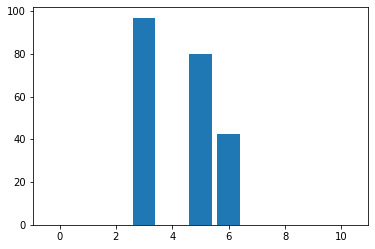

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=11, n_informative=3, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Check which variables are significant
ny_2019_v2.iloc[:, 3]

0       1.97
1       1.60
2       2.31
3       1.56
4       1.89
        ... 
1807    2.71
1808    2.16
1809    2.17
1810    2.24
1811    2.12
Name: HHDCYAVESZ_2019, Length: 1657, dtype: float64

In [ ]:
ny_2019_v2.iloc[:, 5]

0       0.032258
1       0.189283
2       0.209273
3       0.101157
4       0.193488
          ...   
1807    0.015263
1808    0.043481
1809    0.037231
1810    0.037461
1811    0.026592
Name: HISCYHISP_PCT_2019, Length: 1657, dtype: float64

In [ ]:
ny_2019_v2.iloc[:, 6]

0       0.947581
1       0.620946
2       0.357376
3       0.717728
4       0.687442
          ...   
1807    0.983516
1808    0.793200
1809    0.843281
1810    0.869677
1811    0.873469
Name: RACCYWHITE_PCT_2019, Length: 1657, dtype: float64

In [ ]:
# Suppress scientific notation
np.set_printoptions(suppress=True)

In [ ]:
# Cook's D - this gives me 1. as values for all on both DVs - didn't really work

X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 

In [ ]:
# Create instance of influence
influence = model.get_influence()

# Obtain Cook's distance for each observation
cooks = influence.cooks_distance

# Display Cook's distances
print(cooks)

(array([0.        , 0.00095159, 0.00159206, 0.00006424, 0.00026086,
       0.0000081 , 0.00041555, 0.00271673, 0.0003515 , 0.00042394,
       0.00576202, 0.00000967, 0.00077952, 0.00372313, 0.0004466 ,
       0.00021104, 0.01422438, 0.00046862, 0.00056332, 0.00022065,
       0.00041311, 0.00091016, 0.00121848, 0.00105084, 0.00095905,
       0.00251746, 0.00000241, 0.00000598, 0.00013088, 0.00121436,
       0.00399591, 0.00336063, 0.00025713, 0.00055462, 0.0008844 ,
       0.00015286, 0.00068556, 0.00182276, 0.00125613, 0.00003969,
       0.00212995, 0.0000077 , 0.        , 0.00269569, 0.00010346,
       0.0006855 , 0.00053003, 0.00073558, 0.        , 0.        ,
       0.00018934, 0.00046994, 0.00245839, 0.00003044, 0.00539035,
       0.00154912, 0.00003054, 0.00193448, 0.00000481, 0.00004025,
       0.00042017, 0.00117275, 0.00065515, 0.00001837, 0.00060722,
       0.00065421, 0.00028567, 0.00302034, 0.00015312, 0.0001858 ,
       0.00553387, 0.00031547, 0.00089752, 0.00016031, 0.0000

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(ny_2019_v2.X, cooks[0])
# plt.xlabel('X')
# plt.ylabel('Cooks Distance')
# plt.show()

In [ ]:
import statsmodels.api as sm

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
y_train=y_train.values.reshape(-1,1)

In [ ]:
# Stepwise on CC debt change
stepwise_selection(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['EDUCYBACH_PCT_2019', 'HHDCYAVESZ_2019']

In [ ]:
# KNN on CC debt change
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Setup for elbow curve
rmse_val = [] # To store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.07149574175038179
RMSE value for k=  2 is: 0.05490934825650769
RMSE value for k=  3 is: 0.05135606938220583
RMSE value for k=  4 is: 0.05216640090793201
RMSE value for k=  5 is: 0.0523059413005199
RMSE value for k=  6 is: 0.05052115695535415
RMSE value for k=  7 is: 0.0495026878586007
RMSE value for k=  8 is: 0.04892144480627335
RMSE value for k=  9 is: 0.04859818915264188
RMSE value for k=  10 is: 0.04890795536050037
RMSE value for k=  11 is: 0.04858664846863634
RMSE value for k=  12 is: 0.04834618235058018
RMSE value for k=  13 is: 0.04840121293313492
RMSE value for k=  14 is: 0.04840438475764733
RMSE value for k=  15 is: 0.048254790411718755
RMSE value for k=  16 is: 0.04820591172983921
RMSE value for k=  17 is: 0.04862746951741211
RMSE value for k=  18 is: 0.04887091302624859
RMSE value for k=  19 is: 0.04872644140308306
RMSE value for k=  20 is: 0.04868863757218552
RMSE value for k=  21 is: 0.04864002444764359
RMSE value for k=  22 is: 0.0484806887331056

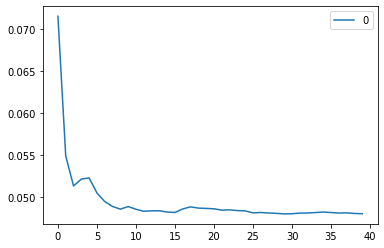

In [ ]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) # elbow curve 
curve.plot()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=29)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=29)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.05780889741316056

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.04810053137875551

In [ ]:
### MEDIAN HH INCOME DV ###
# Add change in median hh income 2019-2021 as y

X = ny_2019_v2.drop(['HMVCYCREDC_change_19_21', 'INCCYMEDHH_change_19_21'], axis=1)
y = ny_2019_v2['INCCYMEDHH_change_19_21']

# Split data into 70% training, 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Scale data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
### MEDIAN HH INCOME DV ###
# OLS method on scaled data
# Results are to predict change in median HH income from 2019-2021

import statsmodels.api as sm
ks = sm.OLS(y, X)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     INCCYMEDHH_change_19_21   R-squared (uncentered):                   0.203
Model:                                 OLS   Adj. R-squared (uncentered):              0.198
Method:                      Least Squares   F-statistic:                              38.20
Date:                     Sun, 08 May 2022   Prob (F-statistic):                    1.11e-73
Time:                             14:38:08   Log-Likelihood:                          1443.9
No. Observations:                     1657   AIC:                                     -2866.
Df Residuals:                         1646   BIC:                                     -2806.
Df Model:                               11                                                  
Covariance Type:                 nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
POPCY_2019           2.619e-07   1.97e-07      1.333      0.183   -1.24e-07    6.47e-07
AGECYMED_2019          -0.0012      0.001     -2.125      0.034      -0.002   -9.63e-05
MARCYMARR_PCT_2019     -0.0245      0.050     -0.488      0.626      -0.123       0.074
HHDCYAVESZ_2019         0.0240      0.010      2.391      0.017       0.004       0.044
RACCYBLACK_PCT_2019     0.0060      0.041      0.147      0.883      -0.074       0.086
HISCYHISP_PCT_2019      0.0446      0.040      1.107      0.269      -0.034       0.124
RACCYWHITE_PCT_2019     0.0286      0.032      0.896      0.371      -0.034       0.091
RACCYASIAN_PCT_2019     0.0163      0.058      0.283      0.777      -0.097       0.129
LBFCYARM_PCT_2019       0.1230      0.131      0.939      0.348      -0.134       0.380
EDUCYBACH_PCT_2019      0.1445      0.078      1.852      0.064      -0.009       0.298
EDUCYGRAD_PCT_2019      0.0264      0.067      0.395      0.693      -0.105       0.157
==============================================================================
Omnibus:                      661.174   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21135.971
Skew:                          -1.224   Prob(JB):                         0.00
Kurtosis:                      20.325   Cond. No.                     1.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 96.94180
Feature: 4, Score: -0.00000
Feature: 5, Score: 79.75507
Feature: 6, Score: 42.32959
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000


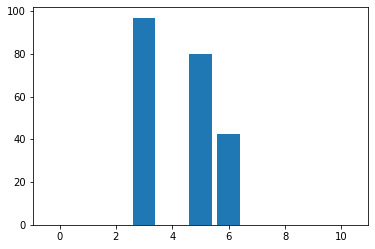

In [ ]:
### MEDIAN HH INCOME DV ###
# define dataset
X, y = make_regression(n_samples=1000, n_features=11, n_informative=3, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
ny_2019_v2.iloc[:, 3]

0       1.97
1       1.60
2       2.31
3       1.56
4       1.89
        ... 
1807    2.71
1808    2.16
1809    2.17
1810    2.24
1811    2.12
Name: HHDCYAVESZ_2019, Length: 1657, dtype: float64

In [ ]:
ny_2019_v2.iloc[:, 5]

0       0.032258
1       0.189283
2       0.209273
3       0.101157
4       0.193488
          ...   
1807    0.015263
1808    0.043481
1809    0.037231
1810    0.037461
1811    0.026592
Name: HISCYHISP_PCT_2019, Length: 1657, dtype: float64

In [ ]:
ny_2019_v2.iloc[:, 6]

0       0.947581
1       0.620946
2       0.357376
3       0.717728
4       0.687442
          ...   
1807    0.983516
1808    0.793200
1809    0.843281
1810    0.869677
1811    0.873469
Name: RACCYWHITE_PCT_2019, Length: 1657, dtype: float64

In [ ]:
# Cook's D - same problem as above
# X = sm.add_constant(X)
# model = sm.OLS(y, X).fit() 

In [ ]:
# # Suppress scientific notation
# np.set_printoptions(suppress=True)

# # Create instance of influence
# influence = model.get_influence()

# # Obtain Cook's distance for each observation
# cooks = influence.cooks_distance

# # Display Cook's distances
# print(cooks)

In [ ]:
y_train=y_train.values.reshape(-1,1)

In [ ]:
stepwise_selection(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['HHDCYAVESZ_2019', 'EDUCYBACH_PCT_2019', 'AGECYMED_2019']

In [ ]:
rmse_val = [] # To store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.1326734491501611
RMSE value for k=  2 is: 0.12004066381908376
RMSE value for k=  3 is: 0.1168763290010286
RMSE value for k=  4 is: 0.11591044161807665
RMSE value for k=  5 is: 0.11437516595418629
RMSE value for k=  6 is: 0.11330911095379417
RMSE value for k=  7 is: 0.11393255445264497
RMSE value for k=  8 is: 0.11356115417069301
RMSE value for k=  9 is: 0.11331750789351563
RMSE value for k=  10 is: 0.11391143864324894
RMSE value for k=  11 is: 0.11428490215209544
RMSE value for k=  12 is: 0.11373931200832516
RMSE value for k=  13 is: 0.11383701169434036
RMSE value for k=  14 is: 0.11367006028142192
RMSE value for k=  15 is: 0.11383450892588354
RMSE value for k=  16 is: 0.11375800990383447
RMSE value for k=  17 is: 0.11385959290601919
RMSE value for k=  18 is: 0.11384549941944609
RMSE value for k=  19 is: 0.11389704442901911
RMSE value for k=  20 is: 0.1141269229815062
RMSE value for k=  21 is: 0.11404597188492828
RMSE value for k=  22 is: 0.11404247133746663


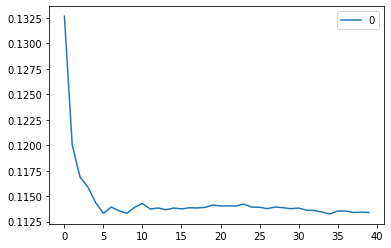

In [ ]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) # elbow curve 
curve.plot()

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=28)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=28)

In [ ]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.09231744822950903

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.11393276546605702